# Week 6: Regression
### Data Science Bootcamp
*Author : Kartik Jindgar*



---



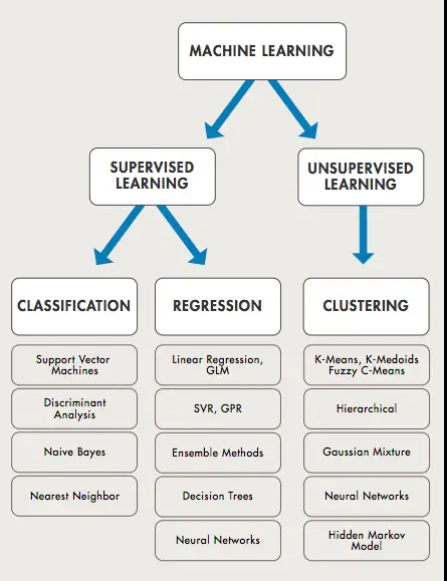

## Linear Regression

<a id="form-of-linear-regression"></a>
### Form of Linear Regression

Recall that each model always contains some amount of random irreducible error $\epsilon$. So, given a prediction $\hat{y}$, the actual $y = \hat{y} + \epsilon$. Below, we will assume $y$ is exactly linear.

- We are often taught the formula for a line is: $y = mx + b$.
- Note this can alternatively be written: $y = \alpha + \beta X$.

---

Here, we will generalize this to $n$ independent variables as follows:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the response.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).
- $\epsilon$ is the _error_ term

A practical example of this applied to BikeShare data might be:

$total\_rides = 20 + -2 \cdot temp + -3 \cdot windspeed\ +\ ...\ +\ 0.1 \cdot registered$

This equation is still called **linear** because the highest degree of the independent variables (e.g. $x_i$) is 1. Note that because the $\beta$ values are constants, they will not be independent variables in the final model, as seen above.

---

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the response.

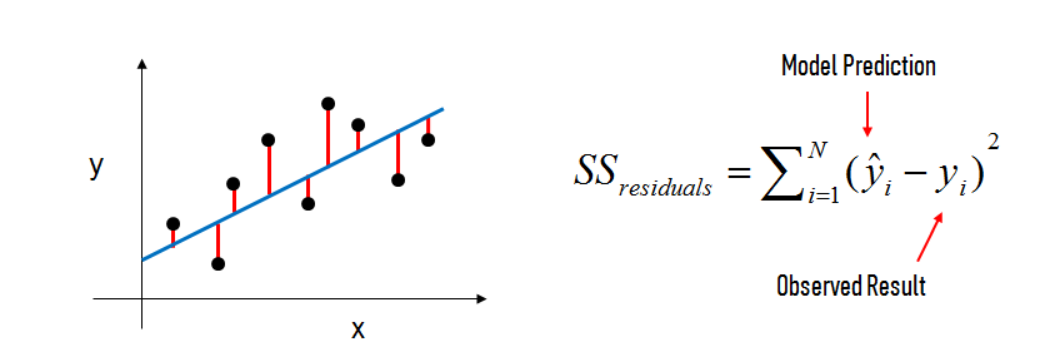

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

---

```Ordinary Least Squares``` has a closed form solution. Meaning that optimum parameters can be computed using the following equation - 

$\beta^*$ = $(X^TX)^{-1}X^Ty$

An extension of Ordinary Least Squares is Regualarized Linear Regression using -

1. Lasso Regularization
2. Ridge 


```Regularization``` helps reduce overfitting by penalizing higher coeffecients.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
# Dimensions of training data
data.shape

(4277, 13)

In [4]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [5]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [6]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [7]:
# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [8]:
#Handling null values in categorical columns
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


## Visualizations

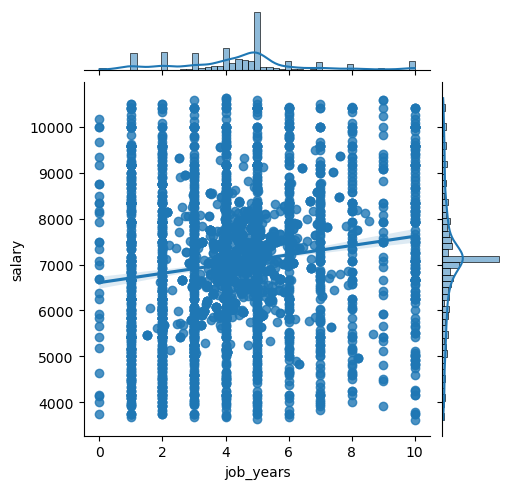

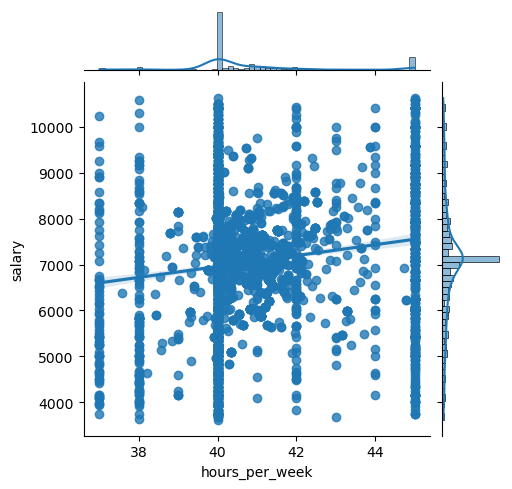

In [10]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()


From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary).

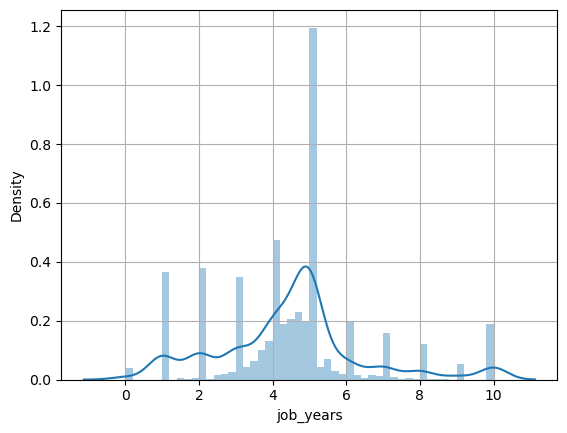

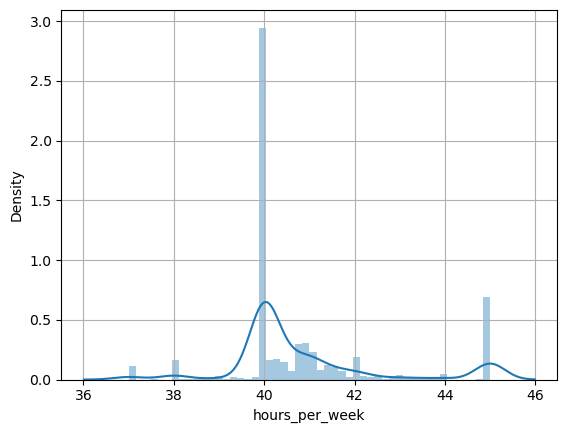

In [11]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimodal distribution showing that most people work from 40 to 45 hours per week.

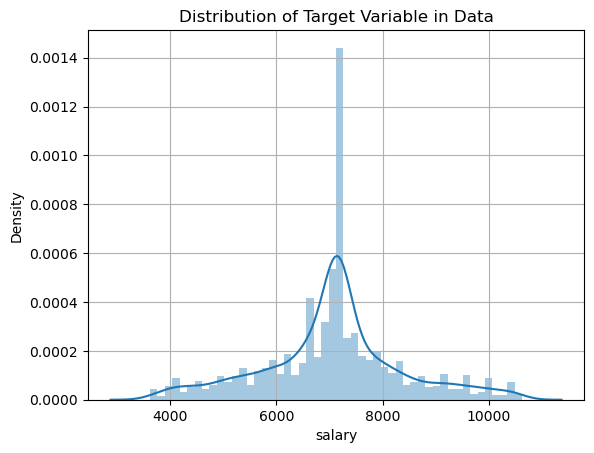

max: 10625.0
min: 3622.0


In [12]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

## Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [13]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [14]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [15]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [16]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [17]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [18]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
1,5.000000,0,40.0,5.0,0,10000.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,1.000000,0,40.0,0.0,1,7000.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,1.000000,0,40.0,2.0,0,8333.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,3.000000,0,40.0,2.0,1,7137.000000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4273,4.140793,1,40.0,0.0,0,7033.845701,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4274,5.000000,0,40.0,0.0,0,7166.000000,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4275,4.000000,1,40.0,2.0,0,9583.000000,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True


## Train Test Split

In [19]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)


Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


## Normalizing data

In [20]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [21]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [22]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
949,-1.229946,0,-1.633709,-0.631489,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3592,2.268244,1,-0.495789,-0.631489,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2879,1.268761,1,2.349011,-0.631489,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
740,1.768502,0,1.211091,2.366125,1,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3343,-1.229946,0,-0.495789,-0.631489,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,0.269278,0,-0.495789,1.766602,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
568,2.767985,0,-0.495789,-0.631489,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1788,-1.729687,0,-0.495789,-0.631489,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False
2101,0.257160,1,-0.102363,-0.631489,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [23]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg.coef_

array([  176.43612716,    86.30441992,   215.90826097,   225.29274065,
          44.96331112,   -99.00564262,    82.06317984, -2167.46687578,
        1108.50051207,   909.84113525,   600.80876915,   558.63283775,
        1160.43776047,   807.32665278,    60.06356406,   976.79556022,
           0.        ,  3661.13042467,   409.31033648,   455.13213643,
         267.22661423,   276.35068623,  -299.45897479,   -81.18646616])

In [25]:
reg.intercept_

6017.921739316

Just to recall 

$\hat{y} = \alpha + \beta_1 * X_1 + \beta_2 * X_2 +...$

Our Final model is given by - 

$\hat{y} = 6112.2 + 1.82 * X_1 + 4.77 * X_2 +...$


In [26]:
mean_absolute_error(y_train,reg.predict(X_train))

860.6504227119252

In [27]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1210.933562668008

## Practice
1. Preprocess Test data and get predictions
2. Compute Mean Abolute Error, Mean Square error for test data
3. Implement [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) and [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) Regression and then compute the following metrics on test data

## Answers

In [28]:
#Q1 and Q2
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

869.6277261892053 1229.4320287134315


In [29]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,0.031297,0.236122,-0.028327,-0.040404,0.510555
std,0.983582,0.424864,0.993149,0.962466,0.500084
min,-2.229428,0.000000,-2.202669,-0.631489,0.000000
25%,-0.379748,0.000000,-0.495789,-0.631489,0.000000
50%,0.089786,0.000000,-0.495789,-0.631489,1.000000
75%,0.269278,0.000000,0.126980,-0.031967,1.000000
max,2.767985,1.000000,2.349011,2.366125,1.000000


869.427325571909 1228.9022214686613


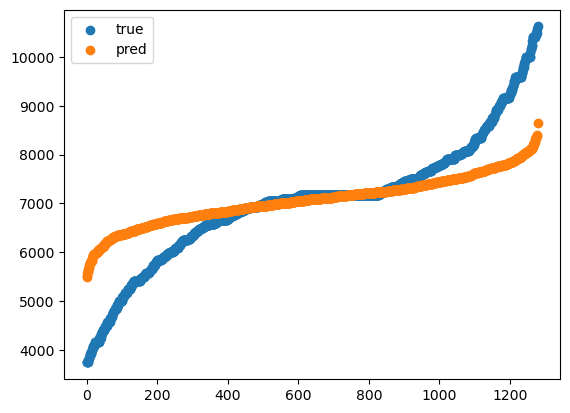

In [30]:
#Q3
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [31]:
ridge.coef_

array([  176.02424168,    88.47190962,   214.46755988,   225.88470895,
          49.19337247,   -97.56175416,    74.13999394, -1101.7222886 ,
        1062.95193903,   868.63485662,   526.13655168,   518.16313971,
        1111.33105739,   761.08027019,    18.97883924,   466.99390039,
           0.        ,  1808.20624173,   406.717986  ,   429.68323565,
         262.64627468,   269.49080428,  -295.7173094 ,   -80.29297415])

868.5272704481285 1227.5430514652262


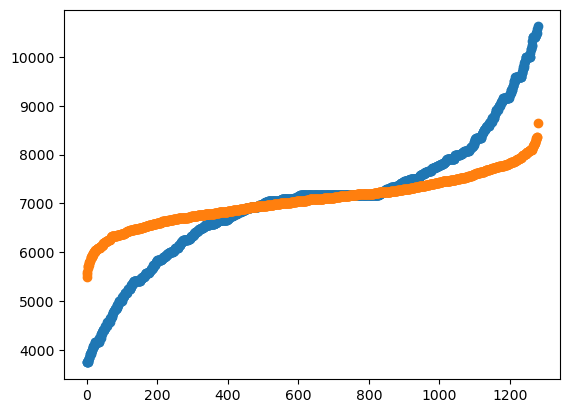

In [32]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [33]:
lasso.coef_

array([ 175.91693208,   88.44719801,  212.29256006,  224.64783499,
         50.44494897,  -65.43737029,    0.        ,   -0.        ,
        980.5247787 ,  793.0500039 ,  295.74501345,  442.35392125,
       1025.76240994,  678.34282374,   -0.        ,    0.        ,
          0.        ,  571.90156363,  378.30335808,  265.23920441,
        230.28443699,  211.7663626 , -259.66615079,  -70.47252733])

# Decision Trees and Random Forests

<a id="part-one"></a>
# Part 1: Regression Trees

In this section, we will make decision trees that predict numeric data. Instead of returning a class, we will return a single numeric value for each set of conditions.

For example, the following tree predicts Major League Baseball salaries based on Years playing in the major leagues and Hits the previous year. Only three different salaries are ever predicted (the average salaries of players that meet each set of conditions): 

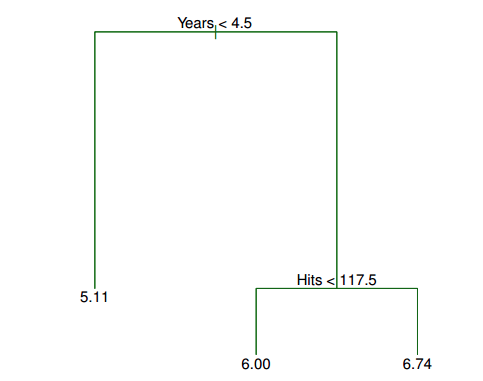

The salary has been divided by 1,000 and log-normalized, for example a salary of \$166,000 refers to the number:

$$5.11 = \ln(\$166000/1000)$$

Similarly, 6.00 is \\$403,000, and 6.74 is \\$846,000. A natural log transform was made because some salaries are much higher than others, leading to a non-ideal long-tail distribution.


The first split is **years < 4.5**, thus that split goes at the top of the tree. When a splitting rule is **true**, you follow the left branch. When a splitting rule is **false**, you follow the right branch.

For players in the **left branch**, the mean salary is \$166,000, thus you label it with that value. (Salary has been divided by 1,000 and log-transformed to 5.11.)

For players in the **right branch**, there is a further split on **hits < 117.5**, dividing players into two more salary regions: \$403,000 (transformed to 6.00), and \$846,000 (transformed to 6.74).

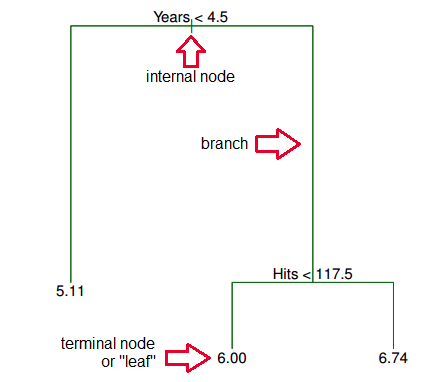

**What does this tree tell you about your data?**

- Years is the most important factor determining salary, with a lower number of years corresponding to a lower salary.
- For a player with a lower number of years, hits is not an important factor in determining salary.
- For a player with a higher number of years, hits is an important factor in determining salary, with a greater number of hits corresponding to a higher salary.


<a id="computer-build"></a>
## How Does a Computer Build a Regression Tree?

**Ideal approach:** Considering every possible partition of the feature space (computationally infeasible).

**"Good enough" approach:** Recursive binary splitting.

1. Begin at the top of the tree.
2. For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint so that the resulting tree has the lowest possible mean squared error (MSE). Make that split.
3. Examine the two resulting regions. Once again, make a **single split** (in one of the regions) to minimize the MSE.
4. Keep repeating Step 3 until a **stopping criterion** is met:
    - Maximum tree depth (maximum number of splits required to arrive at a leaf).
    - Minimum number of observations in a leaf.

---

This is a **greedy algorithm** because it makes locally optimal decisions -- it takes the best split at each step. A greedy algorithm hopes that a series of locally optimal decisions might be optimal overall; however, this is not always the case. For example:

- Always eating cookies to maximize your immediate happiness (greedy) might not lead to optimal overall happiness.

- In our case, reorganizing parts of the tree already constructed based on future splits might result in a better model overall. 

<a id="too-deep"></a>
## What Happens When We Grow a Tree Too Deep?

- **On the left:** A regression tree for salary that is **grown deeper**.
- **On the right:** A comparison of the **training, testing, and cross-validation errors** for trees with different numbers of leaves.

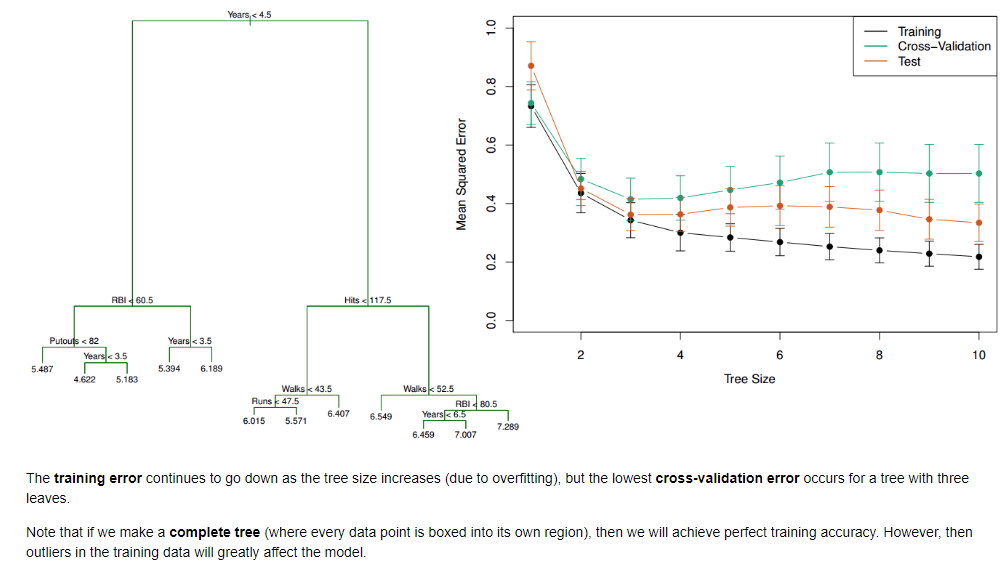

In [34]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

602.2565648616117

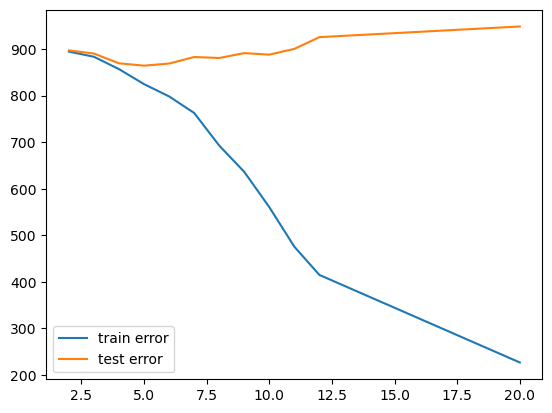

In [35]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [36]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

401.6837932036613

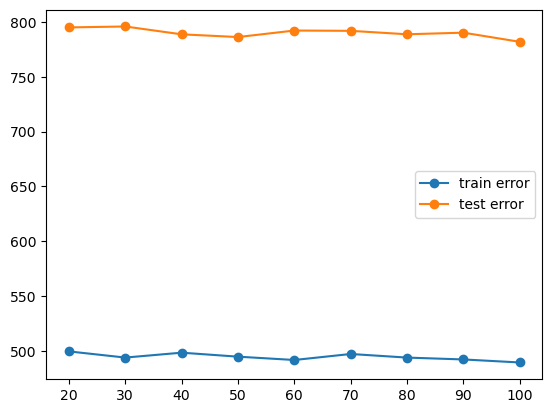

In [37]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

In [38]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)

,feature,importance
0,job_years,25.600144
2,hours_per_week,15.388244
3,telecommute_days_per_week,9.884118
4,certifications,7.078376
23,is_education_computer_related_Yes,6.151090
1,is_manager,5.288805
9,job_title_DBA,4.714539
18,education_Bachelors (4 years),4.129702
11,job_title_Developer,3.773306
20,education_Masters,3.444139


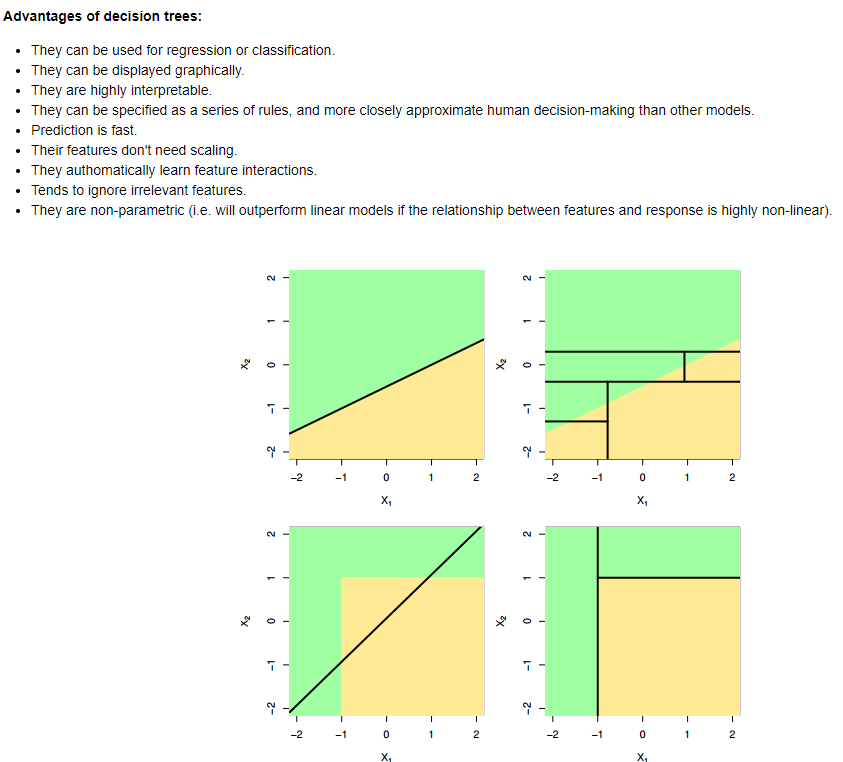

**Disadvantages of decision trees:**

- Their performance is (generally) not competitive with the best supervised learning methods.
- They can easily overfit the training data (tuning is required).
- Small variations in the data can result in a completely different tree (high variance).
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree.
- They don't tend to work well if the classes are highly unbalanced.
- They don't tend to work well with very small data sets.

Practice Questions:
1. Compute errors on test sets
2. Play with different parameter of decision trees and random forests and see the impact on train and test error
3. [OPTIONAL] implement cross validation and get best hyperparameters

In [39]:
randomhw = RandomForestRegressor()
randomhw.fit(X_train, y_train)
mean_absolute_error(y_train,randomhw.predict(X_train))

401.3560906623187

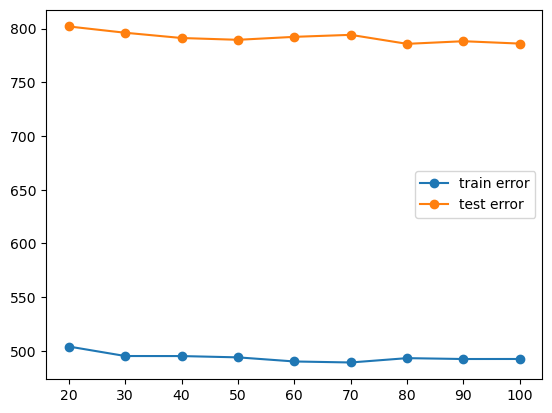

In [46]:
max_depth_list2 = [114,115,116,117,118,119,120,121,122,123,124]
train_error2 = []
test_error2 =[]
N_estimator2=[20,30,40,50,60,70,80,90,100]
for n in N_estimator2:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error2.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error2.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator2,train_error2,marker='o',label = 'train error')
plt.plot(N_estimator2,test_error2,marker='o',label = 'test error')
plt.legend()

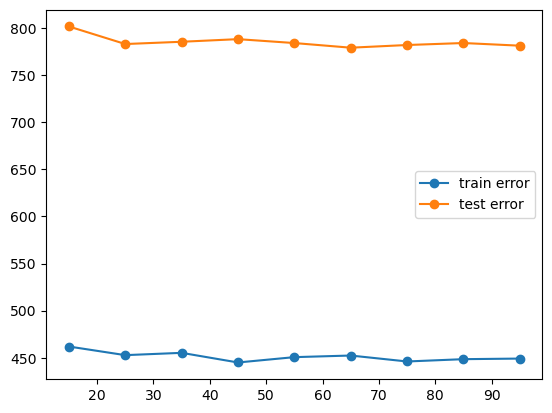

In [48]:
max_depth_list3 = [114,115,116,117,118,119,120,121,122,123,124]
train_error3 = []
test_error3 =[]
N_estimator3=[15,25,35,45,55,65,75,85,95]
for n in N_estimator3:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 15, min_samples_split = 3)
    decisiontree.fit(X_train, y_train)
    train_error3.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error3.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator3,train_error3,marker='o',label = 'train error')
plt.plot(N_estimator3,test_error3,marker='o',label = 'test error')
plt.legend()

# Thank you!